In [190]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [191]:
avocado=pd.read_csv('avocado.csv')
avocado.head()

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [192]:
avocado.tail()

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


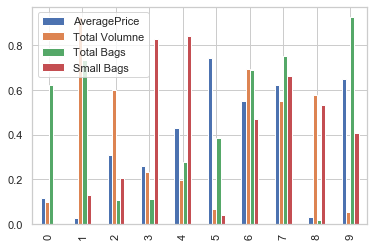

In [193]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AveragePrice','Total Volumne','Total Bags','Small Bags'])
df.plot.bar()

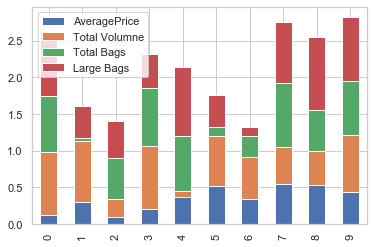

In [194]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AveragePrice','Total Volumne','Total Bags','Large Bags'])
df.plot.bar(stacked=True)

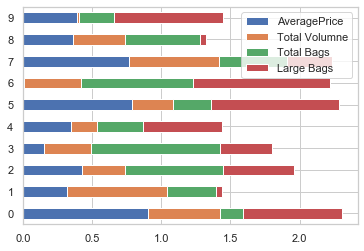

In [195]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AveragePrice','Total Volumne','Total Bags','Large Bags'])
df.plot.barh(stacked=True)

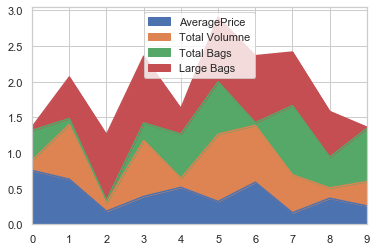

In [196]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AveragePrice','Total Volumne','Total Bags','Large Bags'])
df.plot.area()

In [197]:
df=pd.DataFrame(data=avocado)
df.iloc[50:100,:]

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
50,50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,conventional,2015,Albany
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
52,0,2015-12-27,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta
53,1,2015-12-20,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,conventional,2015,Atlanta
54,2,2015-12-13,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,conventional,2015,Atlanta
55,3,2015-12-06,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,conventional,2015,Atlanta
56,4,2015-11-29,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,conventional,2015,Atlanta
57,5,2015-11-22,1.00,356414.57,269799.03,29732.30,501.16,56382.08,36992.30,19389.78,0.00,conventional,2015,Atlanta
58,6,2015-11-15,1.13,339860.68,263915.78,28442.45,455.97,47046.48,33656.42,13390.06,0.00,conventional,2015,Atlanta
59,7,2015-11-08,1.12,334041.60,250441.38,34483.33,488.24,48628.65,35662.93,12941.12,24.60,conventional,2015,Atlanta


{'whiskers': [<matplotlib.lines.Line2D at 0x2acb6f86888>,
 'caps': [<matplotlib.lines.Line2D at 0x2acb6f86fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acb6f82d48>],
 'medians': [<matplotlib.lines.Line2D at 0x2acb6f8af48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acb6f8ef48>],
 'means': []}

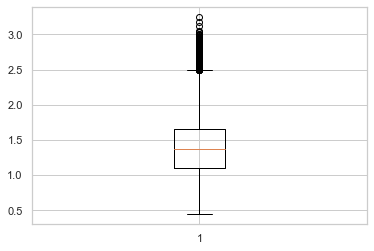

In [198]:
plt.boxplot(df['AveragePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2acb6fe5f48>,
 'caps': [<matplotlib.lines.Line2D at 0x2acb6fecb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acb6fe5748>],
 'medians': [<matplotlib.lines.Line2D at 0x2acb6fefa88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acb6ff4908>],
 'means': []}

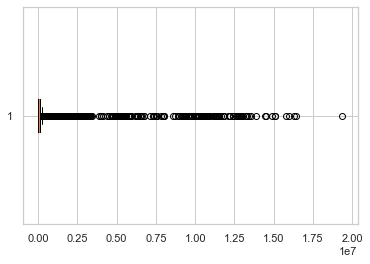

In [199]:
plt.boxplot(df['Total Bags'],vert=False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acb704fec8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acb70153c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acb7056e88>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acb7059788>}

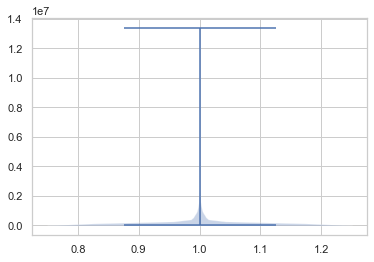

In [200]:
plt.violinplot(df['Small Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acb72190c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acb71ea448>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acb721a308>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acb721aa08>}

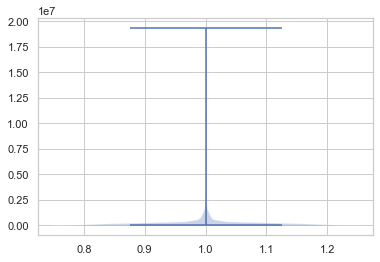

In [201]:
plt.violinplot(df['Total Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acb7219488>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acb431da08>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acb6687fc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acb6684708>}

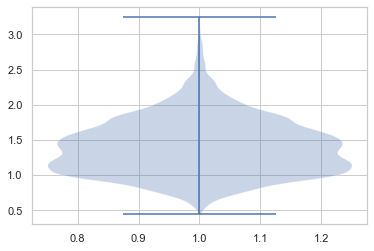

In [202]:
plt.violinplot(df['AveragePrice'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acb663b148>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acb6632f88>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acb663f3c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acb663fa88>}

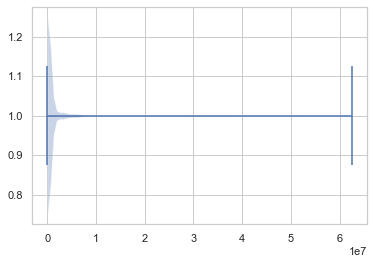

In [203]:
plt.violinplot(df['Total Volume'],vert=False)

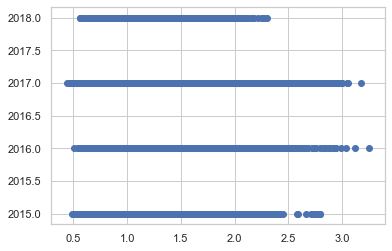

In [204]:
plt.scatter(x='AveragePrice',y='year',data=df)

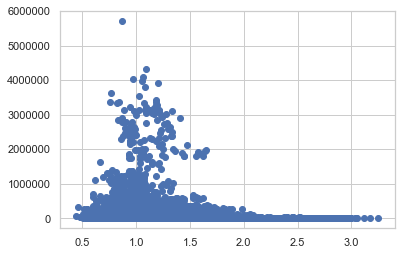

In [205]:
plt.scatter(x='AveragePrice',y='Large Bags',data=df)

In [206]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [207]:
newyork=df[df['region']=='NewYork']
neyo=newyork.head(10)
neyo

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1456,0,2015-12-27,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015,NewYork
1457,1,2015-12-20,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015,NewYork
1458,2,2015-12-13,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015,NewYork
1459,3,2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015,NewYork
1460,4,2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork
1461,5,2015-11-22,1.14,1111803.12,15004.70,905344.06,1227.89,190226.47,156660.80,33558.60,7.07,conventional,2015,NewYork
1462,6,2015-11-15,1.04,1357393.34,23669.62,1107466.31,929.57,225327.84,196060.17,29267.67,0.00,conventional,2015,NewYork
1463,7,2015-11-08,1.13,1406262.16,20146.29,1097994.07,753.78,287368.02,198024.18,89343.84,0.00,conventional,2015,NewYork
1464,8,2015-11-01,1.06,2180520.22,24197.61,1916954.83,1226.57,238141.21,183727.03,54399.03,15.15,conventional,2015,NewYork
1465,9,2015-10-25,1.23,1048045.86,18035.94,790163.44,540.63,239305.85,192750.44,46555.41,0.00,conventional,2015,NewYork


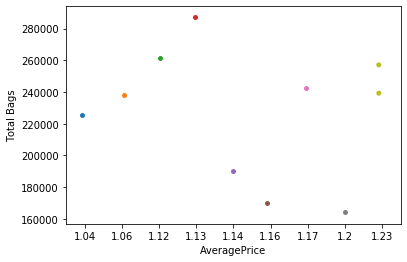

In [19]:
sns.stripplot(x='AveragePrice',y='Total Bags',data=neyo)

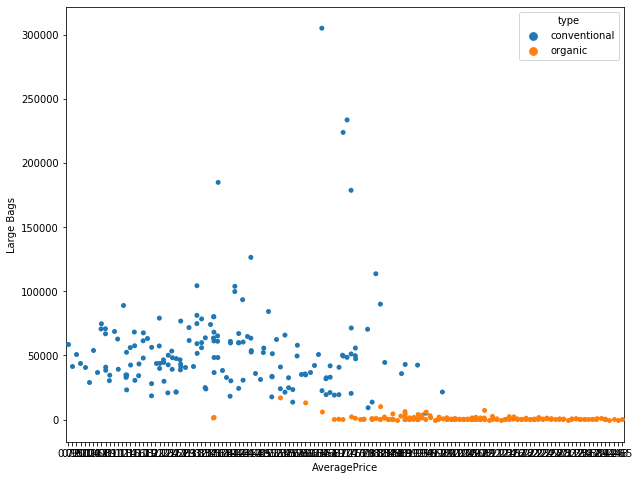

In [20]:
plt.figure(figsize=(10,8))
sns.stripplot('AveragePrice','Large Bags',hue='type',data=newyork)

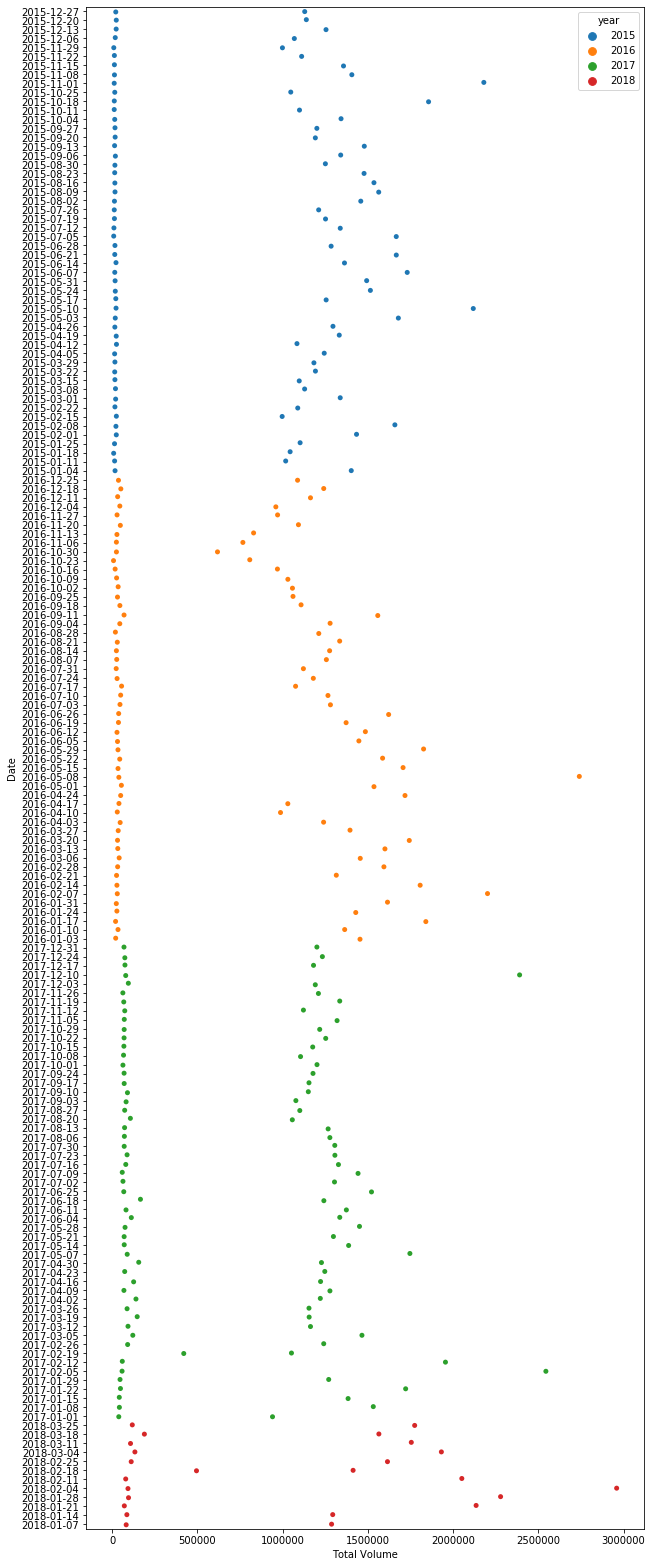

In [21]:
plt.figure(figsize=(10,28))
sns.stripplot('Total Volume','Date',hue='year',data=newyork)

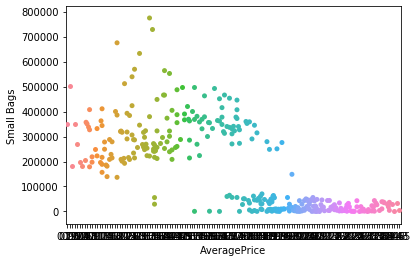

In [22]:
sns.swarmplot('AveragePrice','Small Bags',data=newyork)

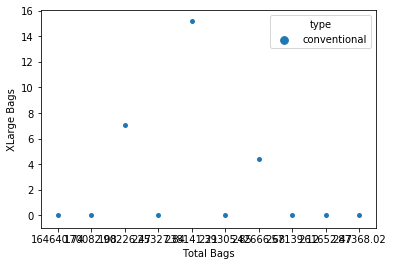

In [23]:
sns.swarmplot('Total Bags','XLarge Bags',hue='type',data=neyo)

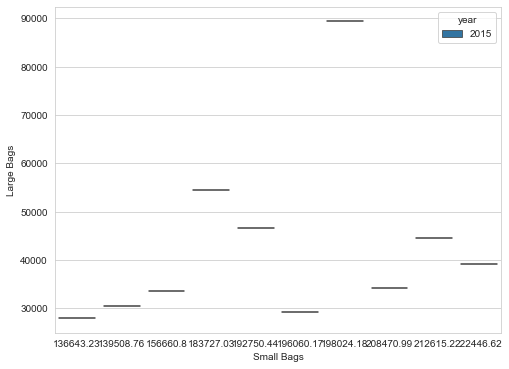

In [24]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.violinplot('Small Bags','Large Bags',hue='year',data=neyo)

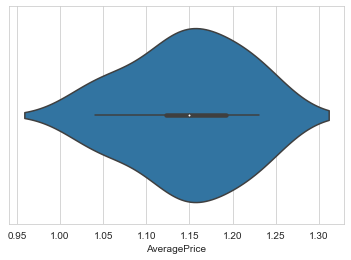

In [25]:
sns.violinplot(neyo['AveragePrice'])

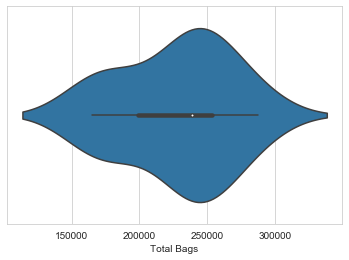

In [26]:
sns.violinplot(neyo['Total Bags'])

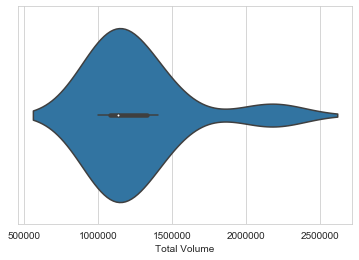

In [27]:
sns.violinplot(neyo['Total Volume'])

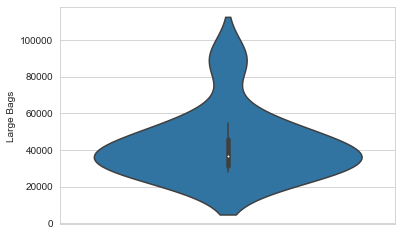

In [28]:
sns.violinplot(y='Large Bags',data=neyo)

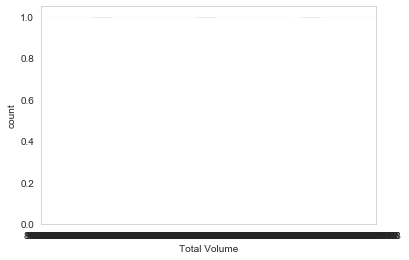

In [29]:
sns.countplot(newyork['Total Volume'])

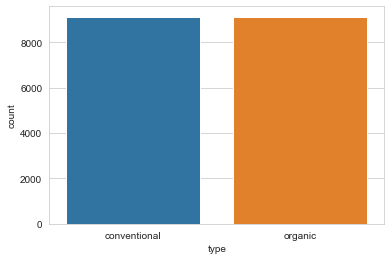

In [30]:
sns.countplot(df['type'])

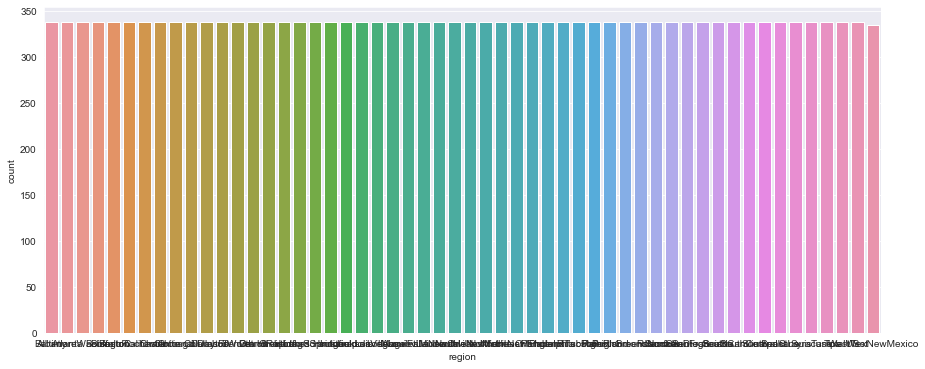

In [31]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(df['region'])

In [32]:
org=df[df['type']=='organic']
orga=org.head(15)
orga

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany
9131,5,2015-11-22,1.94,858.83,13.84,84.18,0.0,760.81,755.69,5.12,0.0,organic,2015,Albany
9132,6,2015-11-15,1.89,1208.54,20.71,238.16,0.0,949.67,949.67,0.00,0.0,organic,2015,Albany
9133,7,2015-11-08,1.88,1332.27,20.08,351.40,0.0,960.79,960.79,0.00,0.0,organic,2015,Albany
9134,8,2015-11-01,1.88,1021.68,11.47,137.58,0.0,872.63,872.63,0.00,0.0,organic,2015,Albany
9135,9,2015-10-25,1.83,1161.90,49.27,148.96,0.0,963.67,963.67,0.00,0.0,organic,2015,Albany


In [33]:
orgt=org.tail(20)
orgt

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,5,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,6,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,11,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,0,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,1,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


(array([  36.,  242.,  954., 2659., 2770., 1595.,  593.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

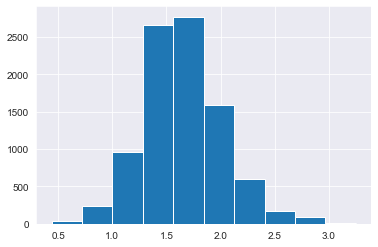

In [34]:
plt.hist(org['AveragePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2acae506c08>,
 'caps': [<matplotlib.lines.Line2D at 0x2acae50cbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acae5061c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2acae510b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acae510c48>],
 'means': []}

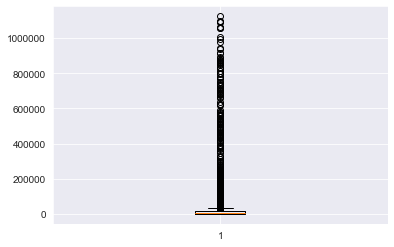

In [35]:
plt.boxplot(org['Total Bags'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2acae56cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2acae56ea88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acae56c708>],
 'medians': [<matplotlib.lines.Line2D at 0x2acae573f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acae579888>],
 'means': []}

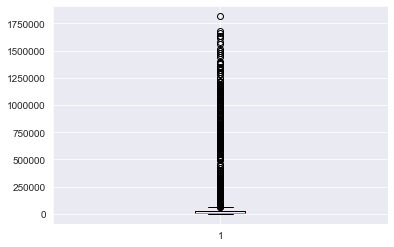

In [36]:
plt.boxplot(org['Total Volume'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acae59a608>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acae5d2308>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acae5d9608>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acae5d9d08>}

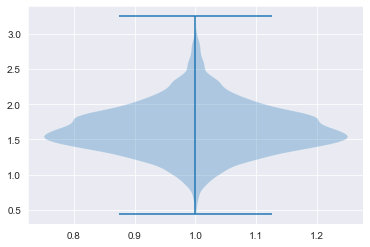

In [37]:
plt.violinplot(org['AveragePrice'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acae7bd2c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acae595788>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acae7c2448>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acae7c2b48>}

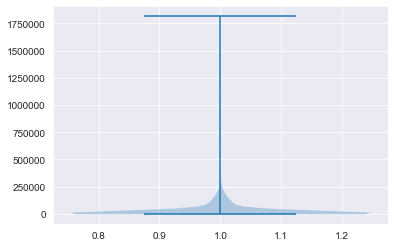

In [38]:
plt.violinplot(org['Total Volume'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acae60e8c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acae822e88>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acae82bf48>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acae82e808>}

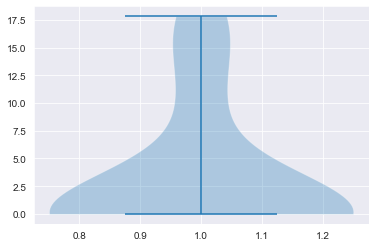

In [39]:
plt.violinplot(orga['Large Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acae85fb48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acae88fb48>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acae896ec8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acae89a5c8>}

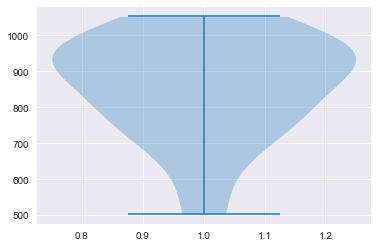

In [40]:
plt.violinplot(orga['Total Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2acae8fa888>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2acae849148>,
 'cmins': <matplotlib.collections.LineCollection at 0x2acae900948>,
 'cbars': <matplotlib.collections.LineCollection at 0x2acae900e48>}

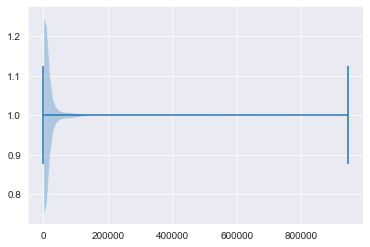

In [41]:
plt.violinplot(org['Small Bags'],vert=False)

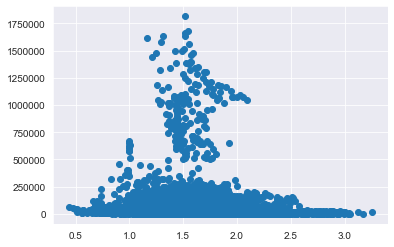

In [42]:
plt.scatter('AveragePrice','Total Volume',data=org)

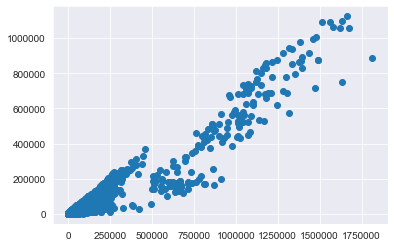

In [43]:
plt.scatter('Total Volume','Total Bags',data=org)

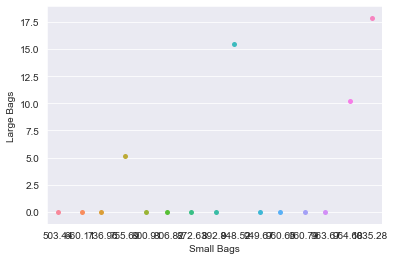

In [44]:
sns.stripplot('Small Bags','Large Bags',data=orga)

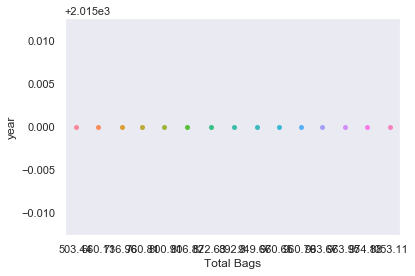

In [45]:
sns.set(style='dark')
sns.stripplot('Total Bags','year',data=orga)

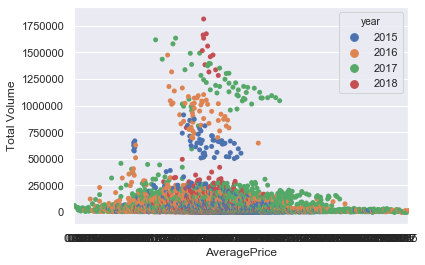

In [46]:
sns.set_style('darkgrid')
sns.swarmplot('AveragePrice','Total Volume',hue='year',data=org)

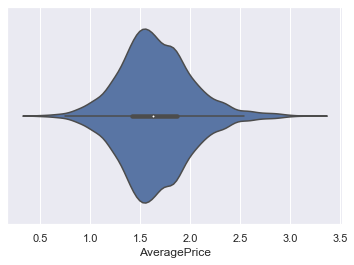

In [47]:
sns.violinplot(org['AveragePrice'])

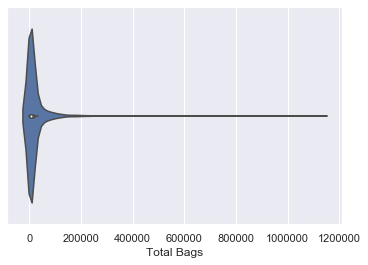

In [48]:
sns.violinplot(org['Total Bags'])

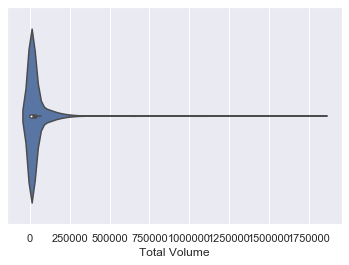

In [49]:
sns.violinplot(org['Total Volume'])

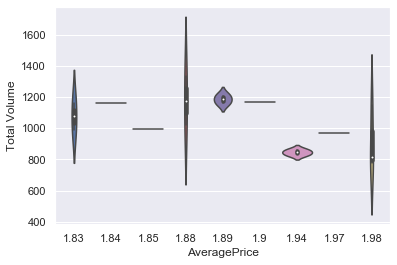

In [50]:
sns.violinplot('AveragePrice','Total Volume',data=orga)

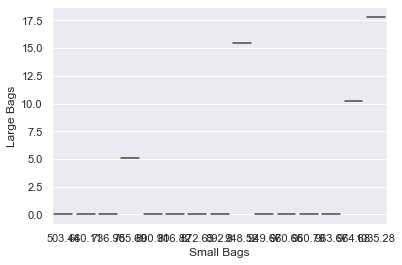

In [51]:
sns.violinplot('Small Bags','Large Bags',data=orga)

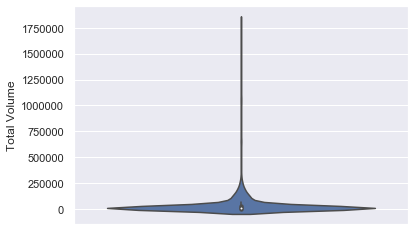

In [52]:
sns.violinplot(y='Total Volume',data=org)

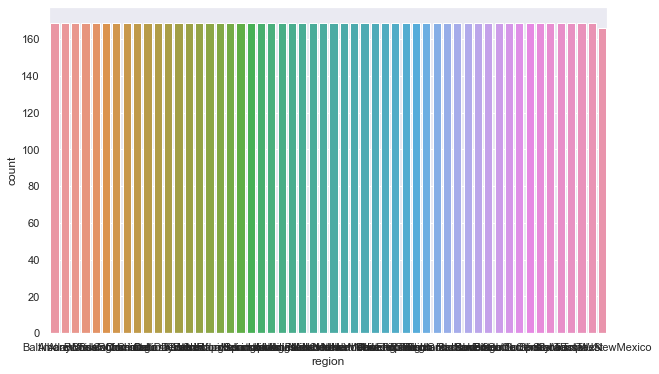

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(org['region'])

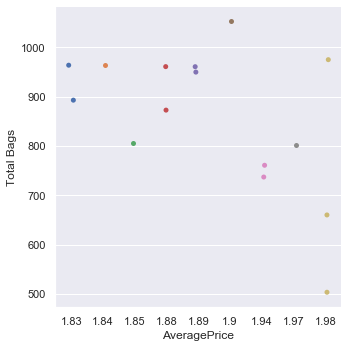

In [54]:
sns.catplot('AveragePrice','Total Bags',data=orga)

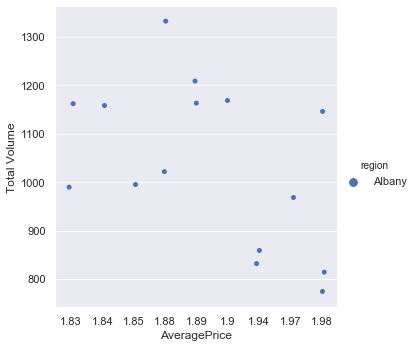

In [55]:
sns.catplot('AveragePrice','Total Volume',hue='region',data=orga)

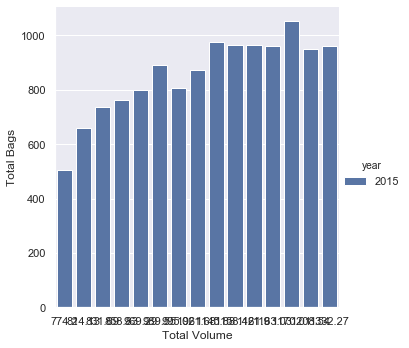

In [56]:
sns.catplot('Total Volume','Total Bags',hue='year',data=orga,kind='bar')

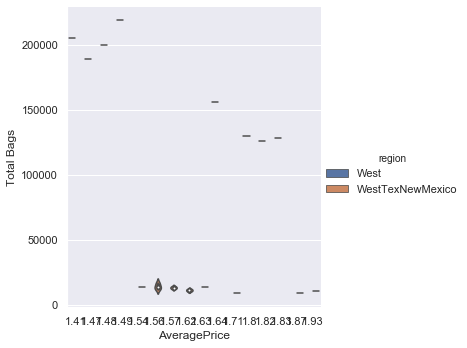

In [57]:
sns.catplot('AveragePrice','Total Bags',hue='region',data=orgt,kind='violin')

<Figure size 720x432 with 0 Axes>

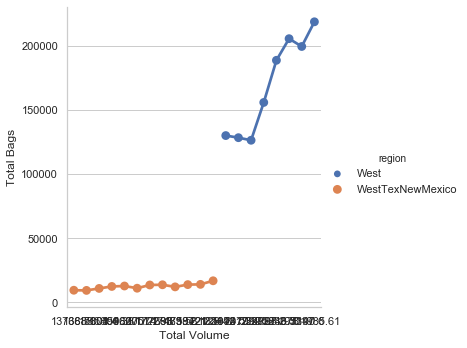

In [58]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.catplot('Total Volume','Total Bags',hue='region',data=orgt,kind='point')

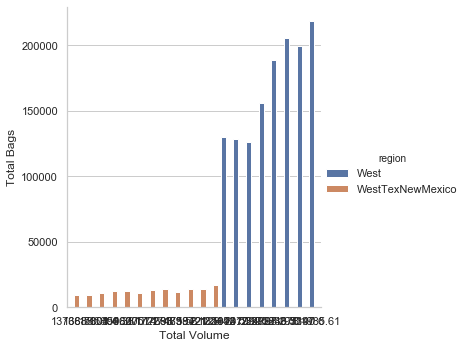

In [59]:
sns.catplot('Total Volume','Total Bags',hue='region',data=orgt,kind='bar')

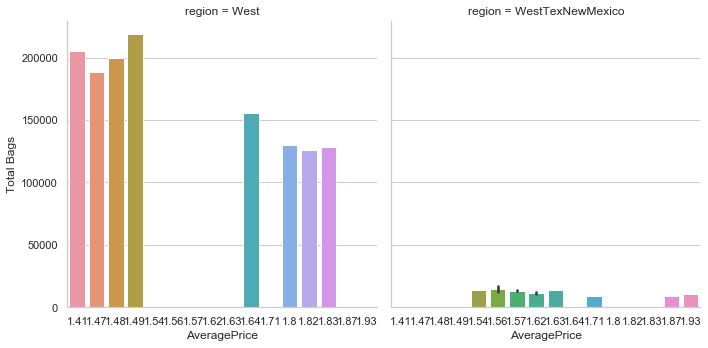

In [60]:
sns.catplot('AveragePrice','Total Bags',col='region',data=orgt,kind='bar')

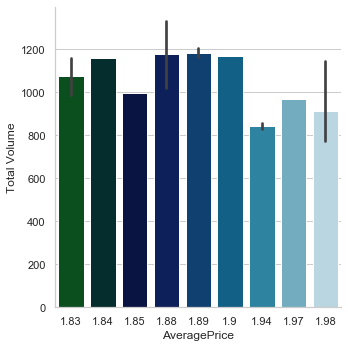

In [61]:
sns.catplot('AveragePrice','Total Volume',data=orga,palette='ocean',kind='bar')

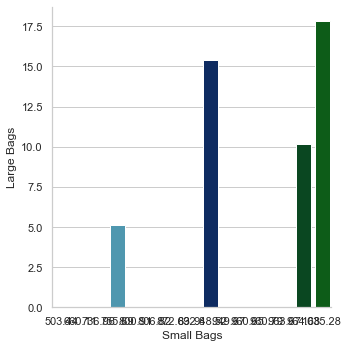

In [62]:
sns.catplot('Small Bags','Large Bags',data=orga,palette='ocean_r',kind='bar')

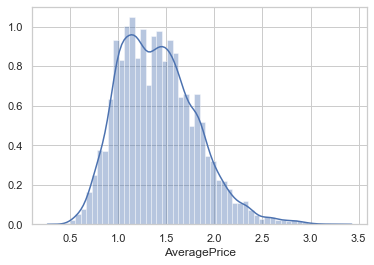

In [63]:
sns.distplot(df['AveragePrice'])

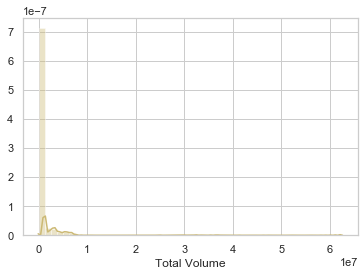

In [64]:
sns.distplot(df['Total Volume'],color='y')

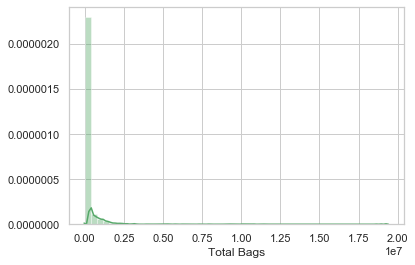

In [65]:
sns.distplot(df['Total Bags'],color='g')

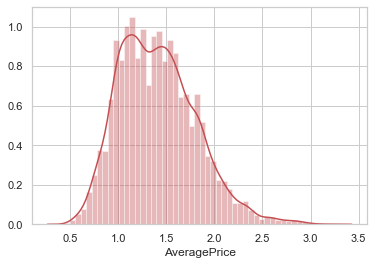

In [66]:
sns.distplot(df['AveragePrice'],color='r')

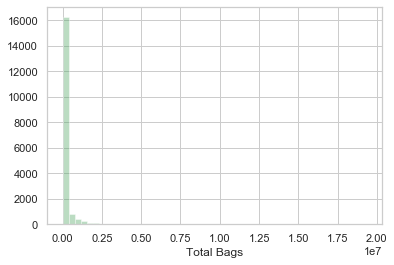

In [67]:
sns.distplot(df['Total Bags'],color='g',kde=False)

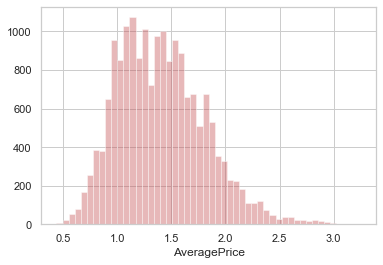

In [68]:
sns.distplot(df['AveragePrice'],color='r',kde=False)

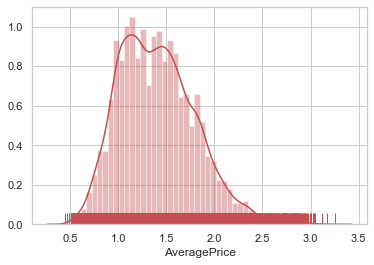

In [69]:
sns.distplot(df['AveragePrice'],color='r',rug=True)

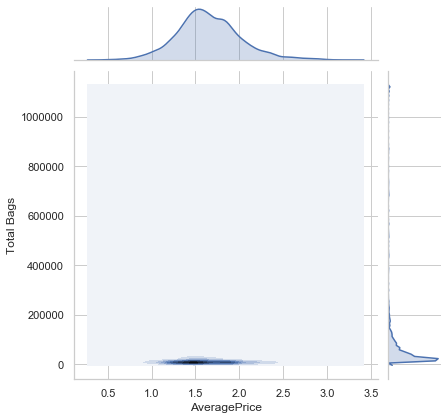

In [70]:
sns.jointplot('AveragePrice','Total Bags',data=org,kind='kde')

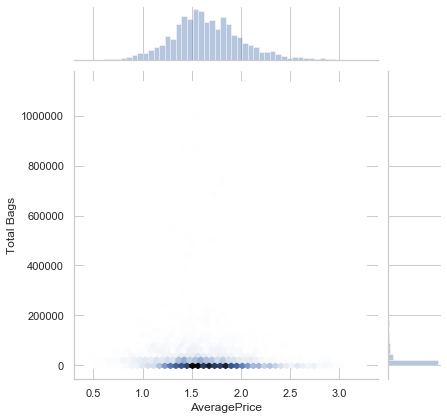

In [71]:
sns.jointplot('AveragePrice','Total Bags',data=org,kind='hex')

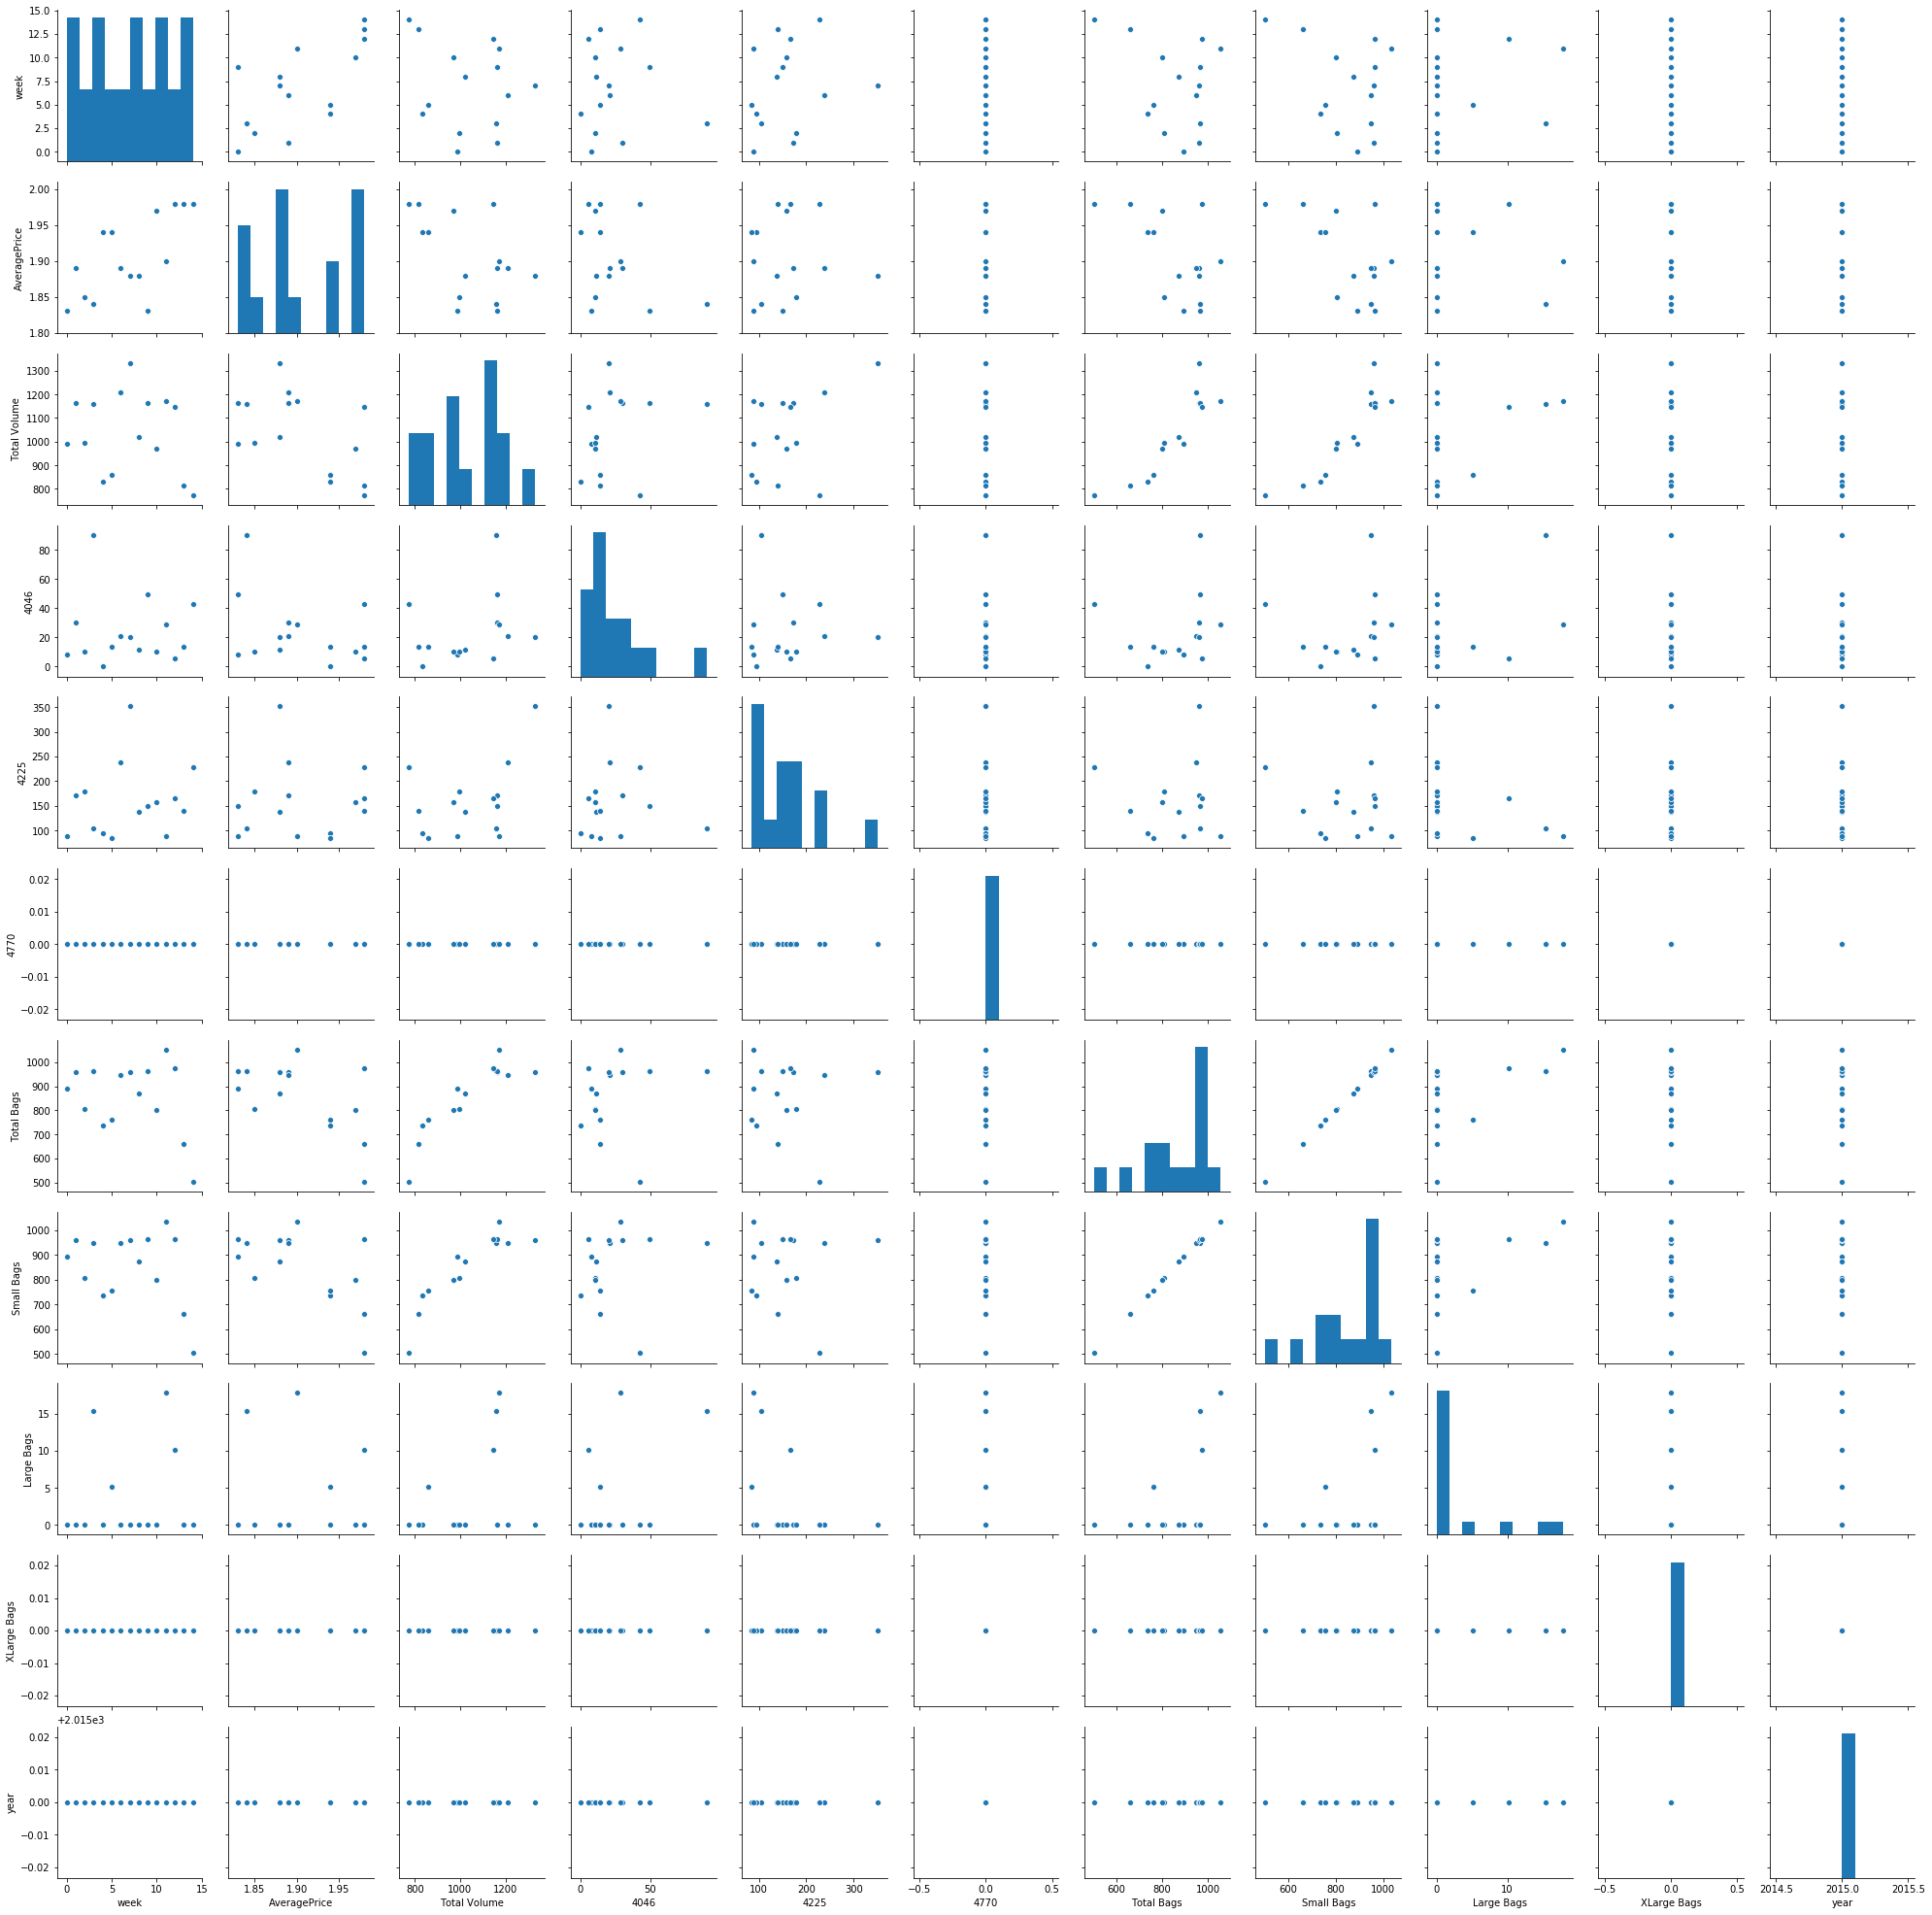

In [16]:
sns.pairplot(orga)

In [72]:
df.columns

Index(['week', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
week            18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [74]:
df.dtypes

week              int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [75]:
df.isnull()

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [76]:
df.isnull().sum()

week            0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [77]:
df.describe()

,week,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [78]:
df.corr()

,week,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
week,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


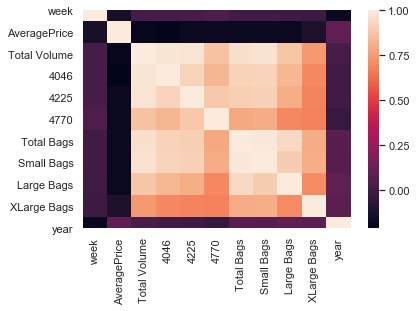

In [79]:
sns.heatmap(df.corr())

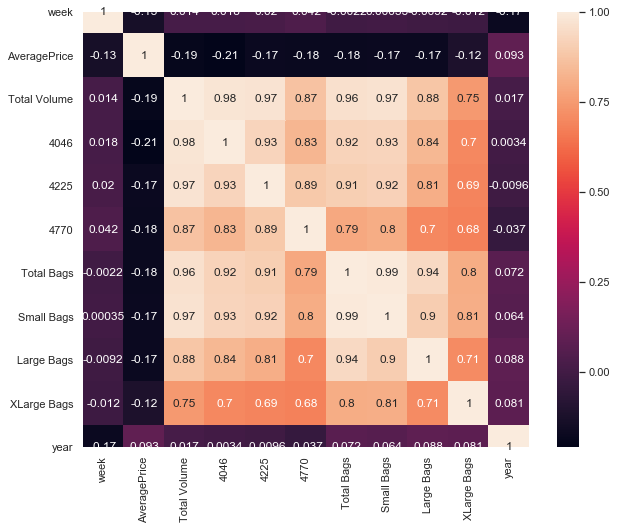

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [208]:
import datetime as dt

In [209]:
df['Date']=pd.to_datetime(df['Date'])
df

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [210]:
df['Date']=df['Date'].map(dt.datetime.toordinal)
df

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [211]:
df.tail()

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,736701,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [212]:
catogry=pd.get_dummies(df['type'],drop_first=True,prefix='type')

In [213]:
df.drop('type',axis=1,inplace=True)

In [214]:
df=pd.concat([df,catogry],axis=1)

In [215]:
df

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,1
18245,8,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1
18246,9,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1
18247,10,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1


In [216]:
df.tail()

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
18244,7,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,1
18245,8,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1
18246,9,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1
18247,10,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1
18248,11,736701,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,WestTexNewMexico,1


In [237]:
x=df.drop(['AveragePrice','region'],axis=1)
x

,week,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,0,735959,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1,735952,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2,735945,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,3,735938,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,4,735931,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,736729,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1
18245,8,736722,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,9,736715,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,10,736708,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [238]:
y=df['region']
y

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
le=LabelEncoder()

In [241]:
y=le.fit_transform(y)
y

array([ 0,  0,  0, ..., 53, 53, 53])

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [248]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB()]

In [249]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

0.237359900373599
[[44  0  0 ...  0  0  0]
 [15  4  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  6  0]
 [ 0  2  0 ...  0 29  0]
 [11  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.08      0.60      0.13        73
           1       0.17      0.05      0.08        79
           2       0.50      0.44      0.47        80
           3       0.08      0.47      0.14        79
           4       0.33      0.15      0.21        79
           5       0.17      0.32      0.22        82
           6       0.66      0.37      0.47        73
           7       0.40      0.12      0.19        80
           8       0.73      0.52      0.61        63
           9       0.31      0.45      0.37        74
          10       0.37      0.10      0.16        69
          11       0.19      0.06      0.09        69
          12       0.49      0.44      0.46        73
          13       0.68      0.37      0.48        75
          14   

0.7977584059775841
[[54  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  2]
 ...
 [ 0  0  0 ... 86  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  4  1 ...  0  0 38]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        73
           1       0.74      0.71      0.72        79
           2       0.89      0.90      0.89        80
           3       0.84      0.77      0.80        79
           4       0.86      0.94      0.90        79
           5       0.75      0.73      0.74        82
           6       0.93      0.96      0.95        73
           7       0.88      0.75      0.81        80
           8       0.85      0.87      0.86        63
           9       0.82      0.80      0.81        74
          10       0.72      0.68      0.70        69
          11       0.89      0.81      0.85        69
          12       0.83      0.89      0.86        73
          13       0.67      0.72      0.69        75
          14  

In [252]:
Y=df['AveragePrice']
Y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [256]:
Y=le.fit_transform(Y)

In [257]:
Y

array([ 86,  88,  46, ..., 140, 146, 115], dtype=int64)

In [258]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=.25,random_state=48)

In [259]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB()]

In [261]:
for m in model:
    m.fit(x_train,Y_train)
    m.score(x_train,Y_train)
    predm=m.predict(x_test)
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print('Actual Price',Y_test)

0.01358755204909051
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00      

0.009861932938856016
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00     

0.03002410694718387
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.20      0.33      0.25         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00      

0.03900942362480824
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.33      0.33      0.33         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.17      0.20      0.18      

0.0050405435020819634
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.03      0.17      0.05         6
          14       0.02      0.33      0.04    

In [265]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,y,cv=8)
print(score.mean())
print(score.std())

0.6171993544053322
0.05156209592353944


In [266]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,Y,cv=10)
print(score.mean())
print(score.std())

0.014123375096447968
0.003519080249885063


In [267]:
from sklearn.externals import joblib

In [268]:
joblib.dump(dtc,'avocdofile.obj')               # I am selecting the model for save DecisionTreeClassifier because this is give high predicted value as compaire to other model.

['avocdofile.obj']